
# Hyprop Project - Agrotech Lab (17252)

Yedidya Harris

Yehuda Yungshtein

---





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  Introduction
<p dir="rtl" style="text-align: right;">
בפרויקט זה ניסינו לייצר כלי יחסית פשוט אך מדויק למדידת תכונות הידראוליות של קרקעות. 
<p dir="rtl" style="text-align: right;">
בעוד שחקלאים רבים מודעים למצב הצומח שלהם ואף לתכונות מסוימות של הקרקע (מרקם הקרקע, כמות יסודות הזנה, כמות גיר וכד'), בדיקות הידראוליות של הקרקע אינן בשימוש נרחב ולרוב החקלאים מסתמכים על קירובים שנגזרים ממרקם הקרקע.

<p dir="rtl" style="text-align: right;">
חיישני קרקע למדידות תכונות הידראוליות הם יקרים מאוד ועל כן גם בדיקה של תכונות אלה יקרה וחקלאים רבים מעדיפים לוותר עליה. אחת השיטות לבדיקת תכונות הידראוליות של הקרקע היא באמצעות חיישן Hyprop. ( למידע נוסף על החיישן עיין בקישורים המצורפים בסןף הקובץ). בפרויקט זה ייצרנו באמצעות חומרים זולים בהרבה חיישן בעל אותו עקרון פעולה -------------------- להוסיף ביחס למה הוא נמדד



<p dir="rtl" style="text-align: right;">
התוצרים הסופיים שנגיע אליהם יהיו :
<p dir="rtl" style="text-align: right;">
1. עקום תאחיזה של הקרקע
<p dir="rtl" style="text-align: right;">
 עקום התאחיזה של הקרקע (מכונה גם curve retention או curve characteristic moisture soil )מתאר את הקשר
בין תכולת הרטיבות לעומד המטריצי במצב של שיווי משקל. עקום התאחיזה הוא הוא בעל חשיבות
רבה בתאור התכונות ההידראוליות של הקרקע והוא נדרש לצורך מידול תהליכי זרימה והסעה, לטובת ניהול ההשקיה
ולישומים רבים נוספים הקשורים לניהול או הערכה של מי הקרקע. ישנם מודלים שונים לחישוב עקום התאחיזה של קרקעות.
<p dir="rtl" style="text-align: right;">
 בפרויקט זה ----------------- להוסיף מידע על עקום תאחיזה ומה אפשר להשיג ממנו
<p dir="rtl" style="text-align: right;">
תכונה חשובה נוספת של הקרקע היא המוליכות ההידראולית שלה. המוליכות ההידראולית תלויה בתכונות הקרקע ובתכונות הזורם והיא מבטאת את היכולת של הקרקע להעביר דרכה זורמים או מומסים , בין אם מדובר במים, חומרי הזנה, מזהמים וכד'.
אפשר להסתכל על המוליכות ההידראולית כתכונה שמבטאת "עד כמה המים בקרקע זורמים דרכה בקלות" והיא חשובה מאוד לחקלאות בהקשר של השקיה והזנת קרקעות. קרקעות חוליות מאופיינות בדרך כלל במוליכות הידראולית גבוהה בעוד שקרקעות חרסיתיות מאופיינות במוליכות הידראולית נמוכה. 




## Methods

<p dir="rtl" style="text-align: right;">
בפרויקט זה חישבנו את המוליכות ההידראולית של הקרקע באמצעות הנוסחה הבאה:

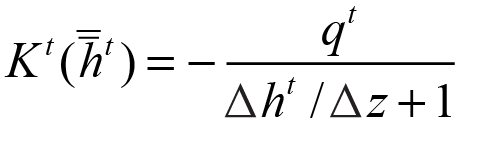

<p dir="rtl" style="text-align: right;">
כאשר:

<p dir="rtl" style="text-align: right;">
k - המוליכות ההידראולית של הקרקע [cm/sec]
<p dir="rtl" style="text-align: right;">
q - שטף המים בקרקע [cm/sec]
<p dir="rtl" style="text-align: right;">
Δh -  בין 2 נקודות המדידה הפרש פוטנציאל המטריצי של הקרקע [cm]
<p dir="rtl" style="text-align: right;">
Δz - הפרש הגובה בין 2 נקודות המדידה [cm]

## Results

### Soil Hydraulic conductivity 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# import libs for reading feed from ThingSpeak
import urllib3
import json
import time

In [ ]:
file_path = '/content/drive/MyDrive/gdrive_folder/Agrotech_project/final_data.xlsx' # enter your data file path here
df = pd.read_excel(file_path, names = ['Date', 'ID', 'Weight_(g)', 'Pressure_Bottom_(cmH20)', 'Pressure_Top_(cmH20)'])
# make 'date' the dataframe index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df  #uncomment to see the dataFrame

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname IDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,ID,Weight_(g),Pressure_Bottom_(cmH20),Pressure_Top_(cmH20)
Date,,,,
2021-07-05 12:48:17,1,-2,4.83533,4.94550
2021-07-05 13:08:11,2,1082,-1.77493,-1.77493
2021-07-05 13:08:27,3,1082,-1.77493,-1.77493
2021-07-05 13:08:44,4,1082,-1.77493,-1.77493
2021-07-05 13:09:01,5,1082,-1.77493,-1.77493
...,...,...,...,...
2021-07-22 11:54:56,85926,877,2.52174,2.74208
2021-07-22 11:55:13,85927,877,2.52174,2.74208
2021-07-22 11:55:30,85928,877,2.52174,2.85225


plots of the raw results

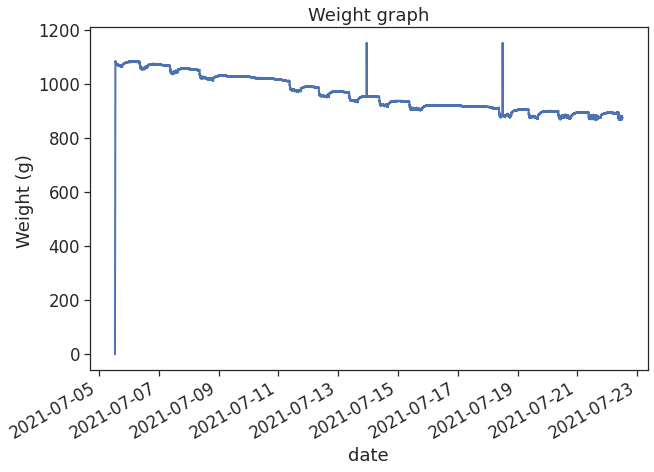

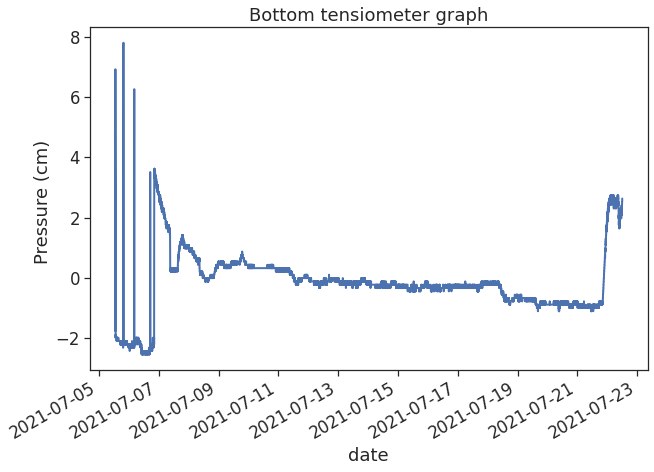

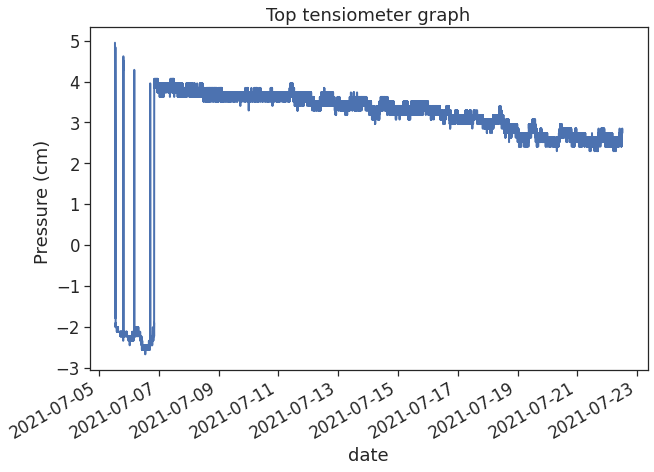

In [ ]:
# weight graph
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Weight_(g)'],  linewidth=2)
ax.set(xlabel="date",
       ylabel="Weight (g) ",
       title="Weight graph");
plt.gcf().autofmt_xdate()  # makes slated dates
# Bottom tensiometer
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Bottom_(cmH20)'],  linewidth=2)
ax.set(xlabel="date",
       ylabel="Pressure (cm) ",
       title="Bottom tensiometer graph");
plt.gcf().autofmt_xdate()  
# Top tensiometer
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Top_(cmH20)'],  linewidth=2)
ax.set(xlabel="date",
       ylabel="Pressure (cm) ",
       title="Top tensiometer graph");
plt.gcf().autofmt_xdate() 

תיקונים והתאמות (הורדת מידע שהמדידות בו לא יציבות או לא רלוונטיות

27

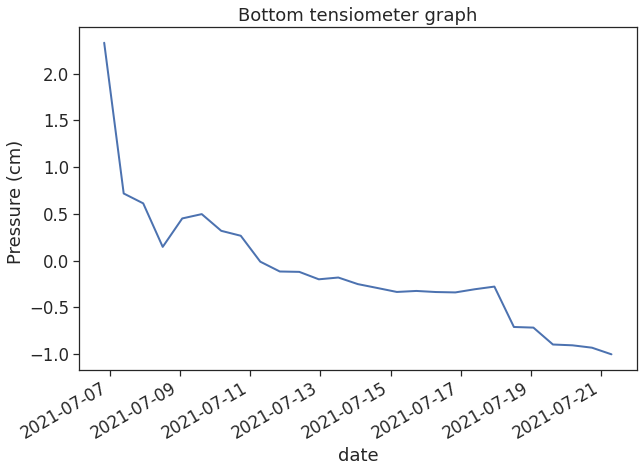

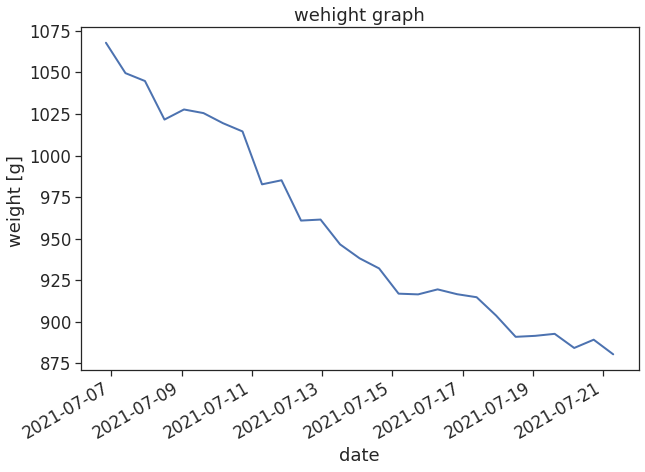

In [ ]:
start_date = '2021-07-06 20:14:33'
end_date = '2021-07-21 15:53:15'
df_raw_backup = pd.DataFrame.copy(df) # backup
df = df[df['Weight_(g)'] < 1100] # deleting the high values of weight in the middle of the measurment
df = df.loc[start_date:end_date]
df = (df.resample('800min', origin='start')
                        .mean()
             )
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Bottom_(cmH20)'],  linewidth=2)
ax.set(xlabel="date",
       ylabel="Pressure (cm) ",
       title="Bottom tensiometer graph");
plt.gcf().autofmt_xdate()  
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Weight_(g)'],  linewidth=2)
ax.set(xlabel="date",
       ylabel="weight [g] ",
       title="wehight graph");
plt.gcf().autofmt_xdate() 
len(df)

In [ ]:
# column of the difference between the pressures in the tensiometer:

# df['Delta P(cmH20)'] = df['Pressure_Top_(cmH20)'] - df['Pressure_Bottom_(cmH20)'] # Use this line instead of line 4 when both pressure sensors give 'good' date
df['Delta P(cmH20)'] = df['Pressure_Top_(cmH20)']
# column of Q
ring_weight = 125.9 # [g], the weight of the plastic ring with sensors (without soil)
start_weight = 1137.5  # the initial weight of the entire system (ring, soil, water). must weigh in the beginning.
df['Weight_(g)'] = df['Weight_(g)'] + 55.5 # calibration
df['delta_Mass_(g)'] = start_weight - df['Weight_(g)'] - ring_weight # calcs the change in weight influenced by water evaporation.
df['Q(cm^3/sec)'] = df['delta_Mass_(g)']/15 # convert from cm^3/15sec into cm^3/sec

# column of q based on the eqution q = Q/A

diameter = 10.536 # this is the diameter of the pipe [cm]  
Area = (diameter/2)**2 * np.pi   # [cm^2] , the area of the pipe
df['q(cm/sec)'] = df['Q(cm^3/sec)'] / Area

# column of K - soil hydraulic conductivity
delta_z = 2 # [cm]
df['k(cm/s)'] = -df['q(cm/sec)']/(1 + (df['Delta P(cmH20)']/delta_z))

# df  #uncomment to see the full DataFrame

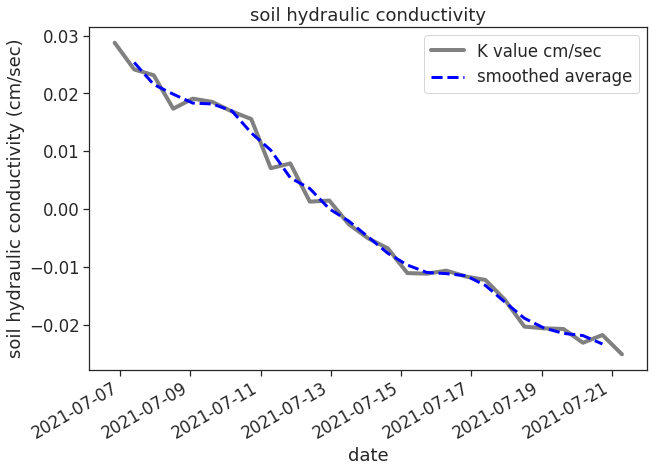

In [ ]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# values for y axis:
ax.plot(df['k(cm/s)'],label='K value cm/sec', color="grey", linewidth=4 )
smooth = df['k(cm/s)'].rolling(3, center=True).mean() 
ax.plot(smooth, label='smoothed average', color="blue", linestyle="--", linewidth=3)
# axes labels and figure title
ax.set_xlabel('date')
ax.set_ylabel('soil hydraulic conductivity (cm/sec)')
ax.set_title('soil hydraulic conductivity')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates
ax.legend(loc = 'upper right')

### water retention curve


In [ ]:
# Volumetric moisture content:
height = 6 #[cm]. enter the soil height in ring
start_volume = Area * height                   # input the initial volume of the sample: soil + saturated water
soil_weight = 788.2                     # input the weight of soil whithout water (air dried)
Vw = df['Weight_(g)'] - soil_weight -ring_weight # volume of the water = weight of water = weight of sample - weight of soil
df['ϴ'] = Vw / start_volume
# df['averege_p(cm)'] = (df['Pressure_Bottom_(cmH20)']+df['Pressure_Top_(cmH20)'])/2 # calc the average between the two pressure sensors is needed for the retension curve. further details see under 'Links'   
df['averege_p(cm)'] = df['Pressure_Top_(cmH20)'] # usung only top reading because the the bottom sensor faulcy.
df['ϴ']


Date
2021-07-06 20:14:33    0.399978
2021-07-07 09:34:33    0.365058
2021-07-07 22:54:33    0.355991
2021-07-08 12:14:33    0.311659
2021-07-09 01:34:33    0.323263
2021-07-09 14:54:33    0.319107
2021-07-10 04:14:33    0.307481
2021-07-10 17:34:33    0.298027
2021-07-11 06:54:33    0.237196
2021-07-11 20:14:33    0.241871
2021-07-12 09:34:33    0.195525
2021-07-12 22:54:33    0.196694
2021-07-13 12:14:33    0.168182
2021-07-14 01:34:33    0.152155
2021-07-14 14:54:33    0.140526
2021-07-15 04:14:33    0.111499
2021-07-15 17:34:33    0.110670
2021-07-16 06:54:33    0.116429
2021-07-16 20:14:33    0.110872
2021-07-17 09:34:33    0.107399
2021-07-17 22:54:33    0.086277
2021-07-18 12:14:33    0.061868
2021-07-19 01:34:33    0.063004
2021-07-19 14:54:33    0.065313
2021-07-20 04:14:33    0.049074
2021-07-20 17:34:33    0.058569
2021-07-21 06:54:33    0.041757
Freq: 800T, Name: ϴ, dtype: float64

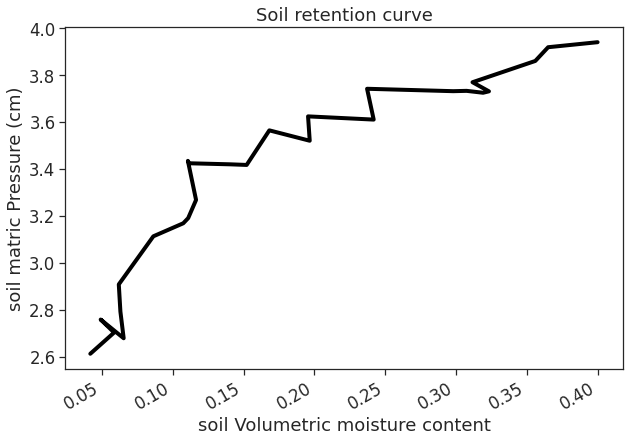

In [ ]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# values for y axis:
ax.plot(df['ϴ'],df['averege_p(cm)'], color="black", linewidth=4 )
# axes labels and figure title
ax.set_xlabel('soil Volumetric moisture content')
ax.set_ylabel('soil matric Pressure (cm)')
ax.set_title('Soil retention curve')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates

1. הצורה של הגרפים יוצאת טובה. צריך היה לעשות כיול ללחץ ולכן הערכים לא אמינים כרגע. בנוסף היה צריך להתאים את הרגישות של המשקל. 
2. כל המים התאדו בוודאות (ידענו מראש את משקל המים)


## Links and sources

1. For more details about Hyprop sensor and other sensors you can read [here](https://www.metergroup.com/environment/articles/how-to-measure-soil-hydraulic-conductivity-which-method-is-right-for-you/) 
2. manual of Hyprop [here](http://library.metergroup.com/Manuals/18263_HYPROP_Manual_Web.pdf)
3. follow our project also [here](https://www.instructables.com/Measuring-Hydraulic-Properties-of-Soil-With-ESP32/)